<a href="https://colab.research.google.com/github/Lukas01001001/google-colab/blob/main/modelbtc_last_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install tensorflow pandas scikit-learn


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 553ms/step - loss: 0.0194 - val_loss: 0.0019
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 543ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 531ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 549ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 530ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - loss: 9.8606e-04 - val_loss: 0.0060
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 557ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 536ms/step - loss: 9.8650e-04 - val_loss: 0.0023
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 531ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 544ms/step - loss: 9.6139e-04 - val_loss: 0.0022
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - loss: 9.6032e-04 - val_loss: 0.0012
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━

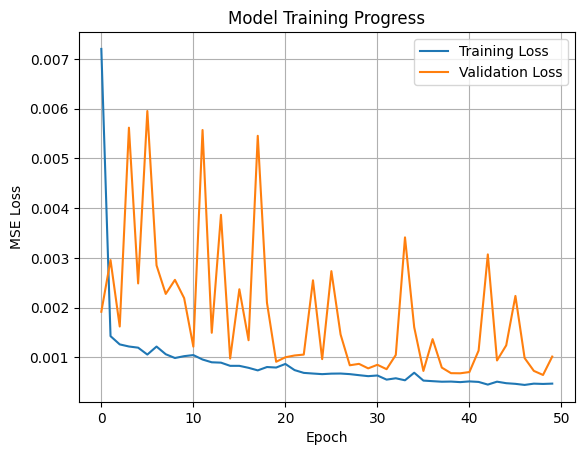

In [12]:
# 📈 BTC Price Forecast – Enhanced LSTM Model (Improved Version)

# === INSTALL DEPENDENCIES (only if using Google Colab) ===
# !pip install tensorflow pandas scikit-learn matplotlib

# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === SETTINGS ===
CSV_PATH = "btcusd_d.csv"
SEQUENCE_LENGTH = 300   # instead of 1500 — shorter sequences improve generalization
EPOCHS = 50
BATCH_SIZE = 32

# === LOAD & CLEAN DATA ===
df = pd.read_csv(CSV_PATH)
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df = df.dropna(subset=['Data'])

prices = df['Zamkniecie'].values.reshape(-1, 1)

# === NORMALIZE ===
scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices)

# === CREATE SEQUENCES ===
X, y = [], []
for i in range(SEQUENCE_LENGTH, len(scaled)):
    X.append(scaled[i-SEQUENCE_LENGTH:i, 0])
    y.append(scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# === BUILD MODEL ===
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQUENCE_LENGTH, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# === EARLY STOPPING ===
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# === TRAIN MODEL ===
history = model.fit(X, y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    validation_split=0.1,
    verbose=1
)

# === SAVE MODEL ===
model.save("model.h5", include_optimizer=False)

# === PLOT LOSS ===
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history.get('val_loss', []), label="Validation Loss")
plt.title("Model Training Progress")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from google.colab import files
files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>